***1 Punto***


In [1]:
import pandas as pan
import matplotlib.pyplot as pylot
import numpy as num
import plotly.figure_factory as factory
from  sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import math as mat 
import plotly.io as pio
import os
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import seaborn as sns
import glob
import random
import matplotlib.image as img
from PIL import Image
from sklearn.decomposition import PCA
csv=pan.read_csv('cities_data.csv', header=0)
csv


,City,GDP (USD Billion),Population (Millions),Unemployment Rate (%),Average Age,Women (%),Men (%),Budget (USD Billion)
0,Bogotá,103.5,7.18,10.5,32,52,48,18.00
1,Medellín,44.1,2.57,11.2,31,53,47,7.50
2,Cali,22.4,2.23,13.8,30,52,48,4.20
3,Barranquilla,16.8,1.23,12.4,29,51,49,3.10
4,Cartagena,10.5,1.03,10.9,30,51,49,2.80
5,Bucaramanga (test),7.3,0.58,9.2,33,52,48,1.50
6,Pereira,6.2,0.48,12.0,32,52,48,1.30
7,Cúcuta (test),5.1,0.76,16.3,28,51,49,1.20
8,Ibagué (test),4.8,0.53,13.4,31,52,48,1.10
9,Santa Marta,4.0,0.52,11.6,29,51,49,0.90


#1.1


In [3]:
for col in csv.drop('City', axis=1, inplace= False):
    print(f'{col} descripcion')
    print('Promedio')
    print(f'{num.mean(csv[col])}')
    print('media')
    print(f'{num.median(csv[col])}')
    print('desviacion estandard')
    print(f'{num.std(csv[col])}')
    print('\n')
    

GDP (USD Billion) descripcion
Promedio
8.750000000000002
media
2.65
desviacion estandard
19.579713140561246


Population (Millions) descripcion
Promedio
0.7310000000000001
media
0.39
desviacion estandard
1.330093605728559


Unemployment Rate (%) descripcion
Promedio
13.833333333333334
media
13.45
desviacion estandard
2.89555214462151


Average Age descripcion
Promedio
29.233333333333334
media
29.0
desviacion estandard
2.2012622641465405


Women (%) descripcion
Promedio
51.5
media
51.0
desviacion estandard
0.7637626158259734


Men (%) descripcion
Promedio
48.5
media
49.0
desviacion estandard
0.7637626158259734


Budget (USD Billion) descripcion
Promedio
1.65
media
0.6
desviacion estandard
3.3931794333142284




#1.2


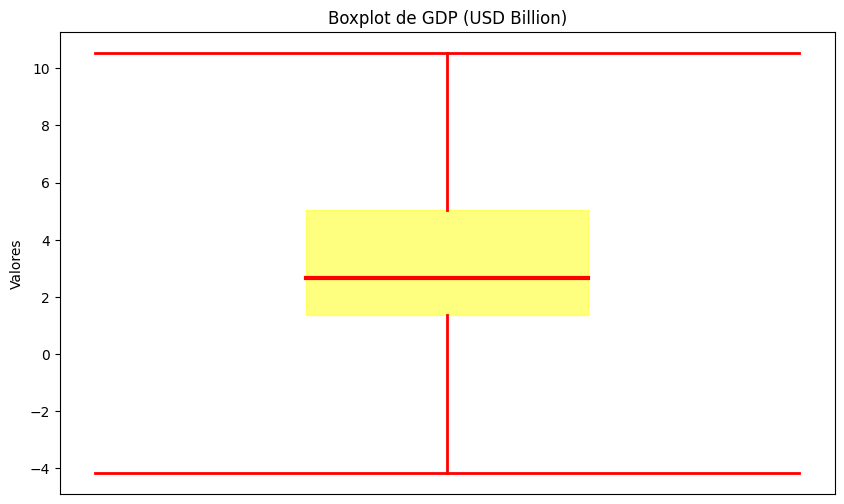

In [4]:
def diagrama(df, column):
    median = num.median(df[column])
    q1 = num.percentile(df[column], 25)
    q3 = num.percentile(df[column], 75)
    iqr = q3 - q1
    bigoteInferior= q1 - 1.5 * iqr
    bigoteSuperior = q3 + 1.5 * iqr
    pylot.figure(figsize=(10, 6))
    pylot.fill_betweenx([q1, q3], 0.98, 1.02, color='yellow', alpha=0.5)
    pylot.plot([0.98, 1.02], [median, median], color='red', lw=3)
    pylot.plot([1, 1], [bigoteInferior, q1], color='red', lw=2)
    pylot.plot([1, 1], [q3, bigoteSuperior], color='red', lw=2)
    pylot.plot([0.95, 1.05], [bigoteInferior, bigoteInferior], color='red', lw=2)
    pylot.plot([0.95, 1.05], [bigoteSuperior, bigoteSuperior], color='red', lw=2)
    pylot.xticks([])
    pylot.ylabel('Valores')
    pylot.title(f'Boxplot de {column}')
    pylot.show()
  
diagrama(csv, 'GDP (USD Billion)')

#1.3

In [10]:
def covarianza(csv,columna1,columna2):
    aux1=csv[columna1].mean()
    aux2=csv[columna2].mean()
    var=len(csv)
    print(var)
    covariance=sum((csv[columna1]-aux1)* (csv[columna2]-aux2))/var

    return covariance

print(covarianza(csv,'GDP (USD Billion)','Population (Millions)'))

30
25.79571666666666


#1.4

In [6]:
def corr(csv,columna1,columna2):
    aux1=csv[columna1].mean()
    aux2=csv[columna2].mean()
    numerador=sum((csv[columna1]-aux1)* (csv[columna2]-aux2))
    denominador=sum((csv[columna1]-aux1)**2)*sum((csv[columna2]-aux2)**2)**(1/2)
    respuesta=numerador/denominador

    return respuesta
print(corr(csv, 'GDP (USD Billion)', 'Population (Millions)'))

0.009236174205606571


#1.5

*La covarianza y la correlacion son dos conceptos que describen como las variables estan relacionadas entre si:*

***covarianza:***
<p> Es una medida que explica si dos variables cambian al mismo tiempo, si es positiva significa que cuando una de ellas aumenta la otra aumenta tambien(osea que se mueven en la misma direccion) pero si la covarianza es negativa significa que cuando una aumenta la otra disminuye.</p>

***correlacion:***
<p> Esta es una version normalizada de la covarianza, dice lo mismo que la covarianza pero el valor de la relacion de las variables se mueve entrre[-1 y 1] lo que lo hace mas facil de interpretar.</p>




#1.6

In [45]:
datosEntrenamientoTest=pan.read_csv('cities_test_data.csv' , header=0)
datosEntrenamientoNormales=pan.read_csv('cities_non_test_data.csv' , header=0)

scaler =StandardScaler()
datosEscaladosTest=scaler.fit_transform(datosEntrenamientoTest.drop('City', axis=1, inplace=False))
datosEscaladosNormales=scaler.fit_transform(datosEntrenamientoNormales.drop('City', axis=1, inplace=False))

def centroides1(csv, valorK):
    retorno= csv[num.random.choice(csv.shape[0],valorK,replace=False)]
    return retorno
    

def clusters(csv,centroides):
    distanciaEuclideana=cdist(csv,centroides,'euclidean')
    retorno=num.argmin(distanciaEuclideana,axis=1)
    return retorno

def actualizarCentroides(csv,valorK,etiqueta ):
    centroide=num.zeros((valorK,csv.shape[1]))
    for i in range(valorK):
        puntosCluster=csv[etiqueta==i]
        centroide[i,:]=puntosCluster.mean(axis=0)
    return centroide

def kmeans(csv, valorK, iteraccionMax=1000, tolerancia=1e-4):
    centroides = centroides1(csv, valorK)
    
    for i in range(iteraccionMax):
        etiqueta = clusters(csv, centroides)
        # Calcular los nuevos centroides (promedio de los puntos en cada grupo)
        centroideNuevo = actualizarCentroides(csv,valorK, etiqueta)
        
        # Si los centroides no cambian mucho, paramos
        diferenciaCentroides =num.abs(centroideNuevo - centroides)
        if num.all(diferenciaCentroides < tolerancia):
            print(f"Convergencia alcanzada en la iteración {i+1}")
            break
        
        # Actualizar los centroides para la siguiente iteración
        centroides = centroideNuevo

    return centroides, etiqueta

centroides, etiqueta = kmeans(datosEscaladosNormales, 6)
datosEntrenamientoNormales['Cluster'] = etiqueta
datosEntrenamientoTest['Cluster_Predicted'] = clusters(datosEscaladosTest, centroides)


ciudadesCercanas = []

for i, filaTest in datosEntrenamientoTest.iterrows():
    clusterId = filaTest['Cluster_Predicted']
    
    # Filtrar las ciudades que están en el mismo cluster
    ciudadesMismoCluster = datosEntrenamientoNormales[datosEntrenamientoNormales['Cluster'] == clusterId]
    
    # Escalar las ciudades del mismo cluster
    ciudadesEscaladas = scaler.transform(ciudadesMismoCluster.drop(['City', 'Cluster'], axis=1))
    
    # Calcular la distancia entre la ciudad de prueba y las ciudades del cluster
    distancias = cdist([datosEscaladosTest[i]], ciudadesEscaladas, 'euclidean')
    
    # Encontrar la ciudad más cercana
    ciudadMasCercanaIdx = num.argmin(distancias)
    ciudadMasCercana = ciudadesMismoCluster.iloc[ciudadMasCercanaIdx]['City']
    
    # Añadir a la lista
    ciudadesCercanas.append(ciudadMasCercana)

# Agregar la ciudad más cercana al dataframe de prueba
datosEntrenamientoTest['Closest_City'] = ciudadesCercanas



##archivo de envio para plataforma 
archivoSumision = datosEntrenamientoTest[['City', 'Closest_City']]
archivoSumision.columns = ['ID', 'label']
archivoSumision.to_csv('submission.csv', index=False)



Convergencia alcanzada en la iteración 3


In [46]:
def centroides1_kmeans_pp(csv, valorK):
    # Inicialización inteligente de centroides (similar a K-means++)
    centroides = []
    
    # Elegimos el primer centroide aleatoriamente
    primerCentroide = csv[num.random.choice(csv.shape[0])]
    centroides.append(primerCentroide)
    
    for _ in range(1, valorK):
        # Calculamos la distancia mínima entre los puntos y los centroides actuales
        distancias = num.min(cdist(csv, num.array(centroides), 'euclidean'), axis=1)
        # Probabilidad proporcional al cuadrado de la distancia
        probabilidades = distancias ** 2 / num.sum(distancias ** 2)
        siguienteCentroide = csv[num.random.choice(csv.shape[0], p=probabilidades)]
        centroides.append(siguienteCentroide)
    
    return num.array(centroides)

def kmeans(csv, valorK, iteraccionMax=1000, tolerancia=1e-4):
    # Usamos la inicialización mejorada de centroides (K-means++)
    centroides = centroides1_kmeans_pp(csv, valorK)
    
    for i in range(iteraccionMax):
        etiqueta = clusters(csv, centroides)
        # Calcular los nuevos centroides (promedio de los puntos en cada grupo)
        centroideNuevo = actualizarCentroides(csv,valorK, etiqueta)
        
        # Si los centroides no cambian mucho, paramos
        diferenciaCentroides = num.abs(centroideNuevo - centroides)
        if num.all(diferenciaCentroides < tolerancia):
            print(f"Convergencia alcanzada en la iteración {i+1}")
            break
        
        # Actualizar los centroides para la siguiente iteración
        centroides = centroideNuevo

    return centroides, etiqueta
ciudadesCercanas = []

for i, filaTest in datosEntrenamientoTest.iterrows():
    clusterId = filaTest['Cluster_Predicted']
    
    # Obtener las ciudades del mismo cluster
    ciudadesMismoCluster = datosEntrenamientoNormales[datosEntrenamientoNormales['Cluster'] == clusterId]
    
    # Calcular la distancia de la ciudad de prueba al centroide del cluster
    distanciasAlCentroide = cdist([datosEscaladosTest[i]], [centroides[clusterId]], 'euclidean')
    
    # Elegir la ciudad más cercana al centroide
    ciudadMasCercanaIdx = num.argmin(distanciasAlCentroide)
    ciudadMasCercana = ciudadesMismoCluster.iloc[ciudadMasCercanaIdx]['City']
    
    # Añadir a la lista
    ciudadesCercanas.append(ciudadMasCercana)

# Agregar la ciudad más cercana al dataframe de prueba
datosEntrenamientoTest['Closest_City'] = ciudadesCercanas

archivoSumision = datosEntrenamientoTest[['City', 'Closest_City']]
archivoSumision.columns = ['ID', 'label']
archivoSumision.to_csv('submission.csv', index=False)


#1.7

In [4]:
def dedograma(csv):
    scaler = StandardScaler()
    csvTransformado = scaler.fit_transform(csv.drop('City', axis=1, inplace=False))
    figura = factory.create_dendrogram(csvTransformado, labels=csv['City'].values)
    figura.update_layout(width=5000, height=1000)
    
    # Guardar como archivo HTML en lugar de mostrarlo directamente
    pio.write_html(figura, file='dendrograma.html', auto_open=True)

dedograma(csv)

***2 Punto***

#2.1

In [17]:
scaler = StandardScaler()
csvTransformado = csv[['GDP (USD Billion)', 'Population (Millions)']]
csv_pca_sc = pan.DataFrame(scaler.fit_transform(csvTransformado), columns=csvTransformado.columns)

matrizDeCovarianza = [[csv_pca_sc['GDP (USD Billion)'].var().item(), covarianza(csv_pca_sc, 'GDP (USD Billion)', 'Population (Millions)' )],[covarianza(csv_pca_sc, 'GDP (USD Billion)', 'Population (Millions)'), csv_pca_sc['Population (Millions)'].var().item()]]
print(matrizDeCovarianza)

30
30
[[1.0344827586206893, 0.990510463650142], [0.990510463650142, 1.03448275862069]]


#2.2

In [19]:
def ecuacionCuadratica(valorA, valorB, valorC):
    # Calcula el discriminante
    discriminante = valorB**2 - 4*valorA*valorC
    # Verifica si el discriminante es negativo, cero o positivo
    if discriminante < 0:
        return "No hay soluciones reales"
    elif discriminante == 0:
        x = -valorB / (2*valorA)
        return x, None
    else:
        x1 = (-valorB + mat.sqrt(discriminante)) / (2*valorA)
        x2 = (-valorB - mat.sqrt(discriminante)) / (2*valorA)
        return x1, x2

eigenvalues = ecuacionCuadratica(1, -2*(matrizDeCovarianza[0][0]), (matrizDeCovarianza[0][0]**2 - matrizDeCovarianza[0][1]**2))
eigenvalues

(2.0249932222708313, 0.04397229497054733)

#2.3

In [21]:
print('Varianza explicada eigenValue 1')
print(f'{eigenvalues[0]/sum(eigenvalues)}')
print(' Varianza explicada eigenValue 2')
print(f'{eigenvalues[1]/sum(eigenvalues)}')

Varianza explicada eigenValue 1
0.9787467240975688
 Varianza explicada eigenValue 2
0.02125327590243122


#2.4

In [25]:
def encontrarEigenvector(matriz, valorPropio):
    # Crear una matriz identidad (básicamente una tabla con 1's en la diagonal y 0's en el resto)
    identidad = num.eye(matriz.shape[0])
    
    # Restar el valor propio multiplicado por la matriz identidad
    matrizRestada = matriz - valorPropio * identidad
    
    # Aquí usamos una función de numpy para encontrar un vector que solucione el problema de la ecuación
    #  nos da el vector asociado al valor propio
    _, _, vectores = num.linalg.svd(matrizRestada)
    
    # El último vector es nuestro eigenvector
    vectorPropio = vectores[-1]
    
    return vectorPropio

# Ahora lo usamos con una matriz de covarianza y el primer valor propio
eigenvector = encontrarEigenvector(num.array(matrizDeCovarianza), eigenvalues[0])
eigenvector

array([0.70710678, 0.70710678])

#2.5

In [26]:
proyeccion_1d = num.dot(csv_pca_sc, eigenvector)
proyeccion_1d

array([ 6.8502549 ,  2.25429149,  1.28986071,  0.55599905,  0.22215487,
       -0.13264057, -0.22552843, -0.1164    , -0.2495073 , -0.28371492,
       -0.33878374, -0.31240449, -0.34981985, -0.33577783, -0.35363312,
       -0.42826202, -0.4461173 , -0.46928881, -0.48353267, -0.50670418,
       -0.53689669, -0.53348711, -0.58855592, -0.61874844, -0.58514634,
       -0.64191995, -0.62958272, -0.65445902, -0.6740191 , -0.67763052])

#2.6

In [29]:
# Reconstruir los datos proyectados de vuelta a su forma original
datosReconstruidos = num.dot(proyeccion_1d[:, num.newaxis], eigenvector[num.newaxis, :])

# Calcular el error de reconstrucción (qué tanto los datos reconstruidos difieren de los originales)
errorReconstruccion = num.linalg.norm(csv_pca_sc - datosReconstruidos) / num.linalg.norm(csv_pca_sc)

# Mostrar el porcentaje de error
print("% Error de reconstrucción:", errorReconstruccion)

% Error de reconstrucción: 0.06888227765491711


#2.7

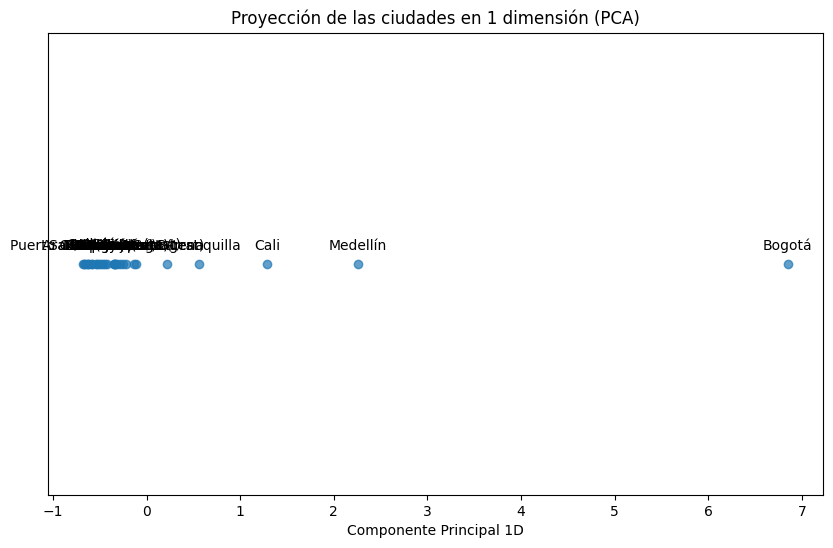

In [37]:

ciudades = csv['City']  # Lista de ciudades

pylot.figure(figsize=(10, 6))
pylot.scatter(proyeccion_1d, [0] * len(proyeccion_1d), alpha=0.7)  # El eje y es 0 para todas las ciudades
pylot.yticks([])  # Ocultar el eje Y, ya que solo necesitamos una dimensión
pylot.title("Proyección de las ciudades en 1 dimensión (PCA)")
pylot.xlabel("Componente Principal 1D")

# Añadir etiquetas de las ciudades
for i, city in enumerate(ciudades):
    pylot.annotate(city, (proyeccion_1d[i], 0), textcoords="offset points", xytext=(0, 10), ha='center')

pylot.savefig('proyeccion_ciudades.png')


#2.8

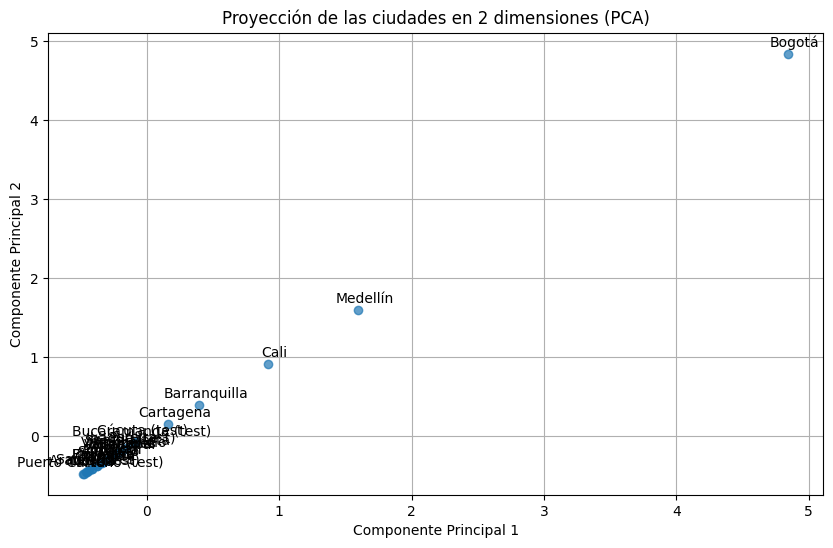

In [41]:
# Crear el gráfico de dispersión en 2D
pylot.figure(figsize=(10, 6))
pylot.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], alpha=0.7)

# Añadir etiquetas de las ciudades
for i, city in enumerate(ciudades):
    pylot.annotate(city, (X_reconstructed[i, 0], X_reconstructed[i, 1]), textcoords="offset points", xytext=(5, 5), ha='center')

# Configurar el título y etiquetas de los ejes
pylot.title("Proyección de las ciudades en 2 dimensiones (PCA)")
pylot.xlabel("Componente Principal 1")
pylot.ylabel("Componente Principal 2")
pylot.grid(True)

# Guardar el gráfico como archivo PNG
pylot.savefig('proyeccion_ciudades_2d.png')
# Mostrar el gráfico
pylot.show()